In [1]:
import pandas as pd
import numpy as np
# %matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
''' We are going to be analysing shipping sales data from a company operating multiple warehouses 
    using multiple modes of shipment to deliver their products to customers.'''

' We are going to be analysing shipping sales data from a company operating multiple warehouses \n    using multiple modes of shipment to deliver their products to customers.'

In [3]:
source = 'C:\\Users\\JACK\\Downloads\\JUPYTER NOTEBOOK FILES\\Datasets\\Shipping & Logistics'

In [4]:
shipping_data = 'shipping_data.csv'

In [5]:
os.chdir(source)

In [6]:
df = pd.read_csv(shipping_data)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached_on_Time      10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [8]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [9]:
# we will calculate the total number of shipments made in the period under consideration
total_shipments = df.shape[0]

In [10]:
total_timely_deliveries = int(np.sum(df['Reached_on_Time'] == 1)) 

In [11]:
total_timely_deliveries

6563

In [12]:
''' What is the percentage of total products delivered on time? '''

' What is the percentage of total products delivered on time? '

In [13]:
percentage_timely_deliveries = round((total_timely_deliveries/total_shipments)*100, 3)

In [41]:
percentage_timely_deliveries

59.669

In [42]:
percentage_timely_deliveries_dict = dict(Total=100, On_Time=percentage_timely_deliveries)

[Text(0.5, 0, 'Deliveries'),
 Text(0, 0.5, 'Percentage of total (%)'),
 Text(0.5, 1.0, 'Percentage of shipments delivered on time')]

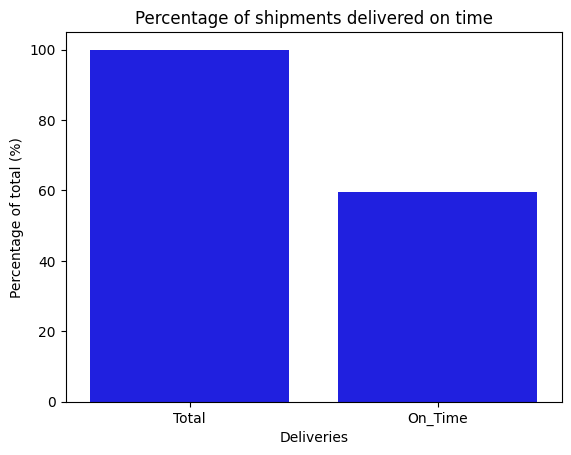

In [44]:
sns.barplot(data=percentage_timely_deliveries_dict, color='b').set(xlabel='Deliveries', ylabel='Percentage of total (%)',\
                                                                  title='Percentage of shipments delivered on time')

In [15]:
''' Which warehouse block shipped the most products? '''

' Which warehouse block shipped the most products? '

In [16]:
warehouse_blocks = df['Warehouse_block'].value_counts()

In [17]:
warehouse_blocks

Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64

In [18]:
warehouse_blocks_dict = warehouse_blocks.to_dict()

[Text(0.5, 0, 'Warehouse block'),
 Text(0, 0.5, 'Total shipments'),
 Text(0.5, 1.0, 'Total shipments from warehouse blocks')]

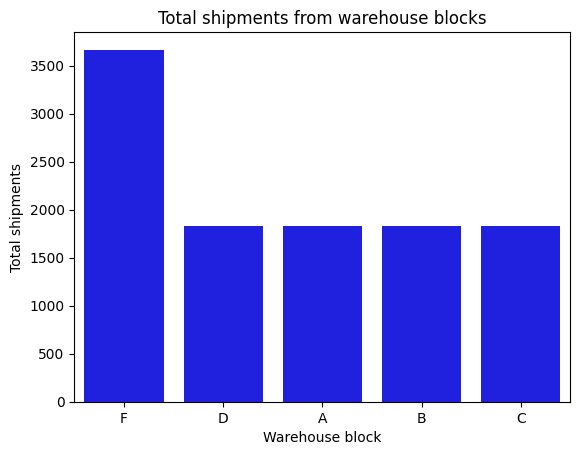

In [19]:
sns.barplot(data=warehouse_blocks, color='blue').set(xlabel='Warehouse block', ylabel='Total shipments',\
                                                    title='Total shipments from warehouse blocks')

In [20]:
warehouse_blocks_dict

{'F': 3666, 'D': 1834, 'A': 1833, 'B': 1833, 'C': 1833}

In [21]:
''' What was the most frequently used mode of shipment? '''

' What was the most frequently used mode of shipment? '

In [22]:
modes_of_shipment = df['Mode_of_Shipment'].value_counts()

In [23]:
modes_of_shipment

Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64

[Text(0.5, 0, 'Mode of Shipment'),
 Text(0, 0.5, 'No of times used'),
 Text(0.5, 1.0, 'Most frequently used modes of shipment')]

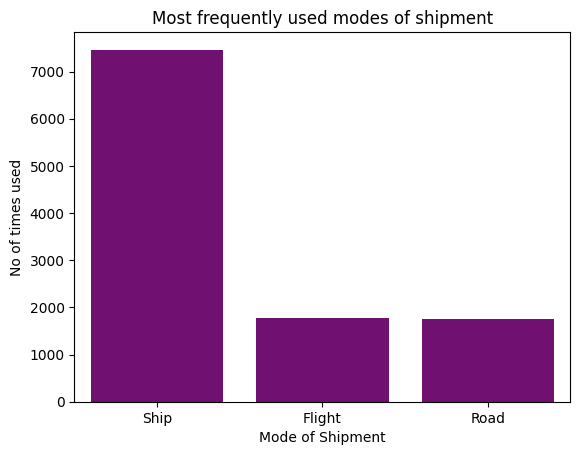

In [24]:
sns.barplot(data=modes_of_shipment, color='purple').set(xlabel='Mode of Shipment', ylabel='No of times used',\
                                                       title='Most frequently used modes of shipment')

In [25]:
''' What is the total weight of all products shipped? '''

' What is the total weight of all products shipped? '

In [26]:
total_shipment_weight_in_gms = df['Weight_in_gms'].sum()

In [27]:
total_shipment_weight_in_tonnes = total_shipment_weight_in_gms/1000000

In [28]:
total_shipment_weight_in_tonnes

np.float64(39.97055)

In [29]:
''' What is the total revenue from all shipped products? '''

' What is the total revenue from all shipped products? '

In [30]:
total_revenue = df['Cost_of_the_Product'].sum() - df['Discount_offered'].sum()

In [31]:
total_revenue

np.int64(2164863)

In [32]:
print(f' Total Revenue (USD) = {total_revenue:,.2f}')

 Total Revenue (USD) = 2,164,863.00


In [33]:
warehouse_block_grouped = df.groupby('Warehouse_block')

In [34]:
''' Which warehouse block received the most customer care calls? '''

' Which warehouse block received the most customer care calls? '

In [35]:
block_A_customer_care_calls = np.sum(warehouse_block_grouped.get_group('A')['Customer_care_calls'])

In [36]:
block_A_customer_care_calls

np.int64(7402)

In [37]:
block_B_customer_care_calls = np.sum(warehouse_block_grouped.get_group('B')['Customer_care_calls'])

In [38]:
block_C_customer_care_calls = np.sum(warehouse_block_grouped.get_group('C')['Customer_care_calls'])

In [39]:
block_D_customer_care_calls = np.sum(warehouse_block_grouped.get_group('D')['Customer_care_calls'])

In [40]:
block_F_customer_care_calls = np.sum(warehouse_block_grouped.get_group('F')['Customer_care_calls'])

In [48]:
customer_care_calls_dict = dict(A=block_A_customer_care_calls, B=block_B_customer_care_calls, C=block_C_customer_care_calls,\
                                            D=block_D_customer_care_calls, F=block_F_customer_care_calls)

In [49]:
customer_care_calls_dict

{'A': np.int64(7402),
 'B': np.int64(7369),
 'C': np.int64(7451),
 'D': np.int64(7434),
 'F': np.int64(14939)}

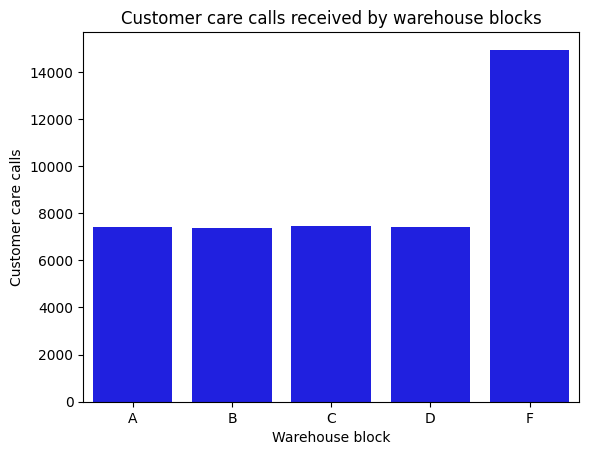

In [50]:
bar_plot = sns.barplot(data=customer_care_calls_dict, color='blue').set(xlabel='Warehouse block', ylabel='Customer care calls',\
                                                                         title='Customer care calls received by warehouse blocks')

In [51]:
''' Which warehouse block shipped the most products of high importance?'''

' Which warehouse block shipped the most products of high importance?'

In [52]:
block_A_high_importance = np.sum(warehouse_block_grouped.get_group('A')['Product_importance'] == 'high')

In [53]:
block_A_high_importance

np.int64(165)

In [54]:
block_B_high_importance = np.sum(warehouse_block_grouped.get_group('B')['Product_importance'] == 'high')

In [55]:
block_C_high_importance = np.sum(warehouse_block_grouped.get_group('C')['Product_importance'] == 'high')

In [56]:
block_D_high_importance = np.sum(warehouse_block_grouped.get_group('D')['Product_importance'] == 'high')

In [57]:
block_F_high_importance = np.sum(warehouse_block_grouped.get_group('F')['Product_importance'] == 'high')

In [61]:
high_importance_prods_dict = dict(A=block_A_high_importance, B=block_B_high_importance, C=block_C_high_importance,\
                                              D=block_D_high_importance, F=block_F_high_importance)

[Text(0.5, 0, 'Warehouse block'),
 Text(0, 0.5, 'High Importance Products'),
 Text(0.5, 1.0, 'Shipment of high importance products by warehouse blocks')]

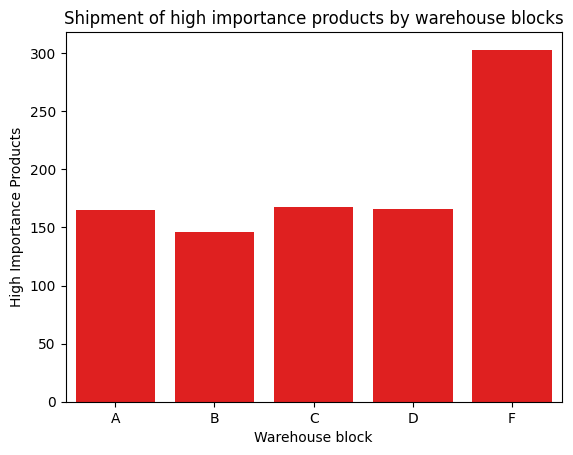

In [62]:
sns.barplot(data=high_importance_prods_dict, color='red').set(xlabel='Warehouse block', ylabel='High Importance Products',\
                                                               title='Shipment of high importance products by warehouse blocks')

In [63]:
''' Which warehouse block shipped the most products of medium importance? '''

' Which warehouse block shipped the most products of medium importance? '

In [64]:
block_A_medium_importance = np.sum(warehouse_block_grouped.get_group('A')['Product_importance'] == 'medium')

In [65]:
block_B_medium_importance = np.sum(warehouse_block_grouped.get_group('B')['Product_importance'] == 'medium')

In [66]:
block_C_medium_importance = np.sum(warehouse_block_grouped.get_group('C')['Product_importance'] == 'medium')

In [67]:
block_D_medium_importance = np.sum(warehouse_block_grouped.get_group('D')['Product_importance'] == 'medium')

In [68]:
block_F_medium_importance = np.sum(warehouse_block_grouped.get_group('F')['Product_importance'] == 'medium')

In [69]:
medium_importance_prods_dict = dict(A=block_A_medium_importance, B=block_B_medium_importance, C=block_C_medium_importance,\
                                              D=block_D_medium_importance, F=block_F_medium_importance)

[Text(0.5, 0, 'Warehouse block'),
 Text(0, 0.5, 'Medium Importance Products'),
 Text(0.5, 1.0, 'Shipment of medium importance products by warehouse blocks')]

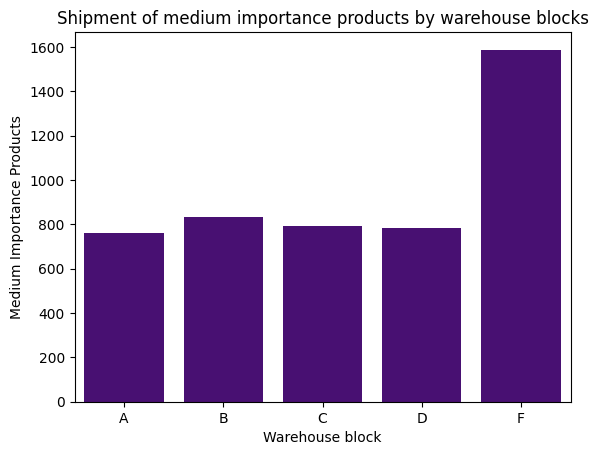

In [70]:
sns.barplot(data=medium_importance_prods_dict, color='indigo').set(xlabel='Warehouse block', ylabel='Medium Importance Products',\
                                                                    title='Shipment of medium importance products by warehouse blocks')

In [71]:
''' Which warehouse block shipped the most products of low importance? '''

' Which warehouse block shipped the most products of low importance? '

In [72]:
block_A_low_importance = np.sum(warehouse_block_grouped.get_group('A')['Product_importance'] == 'low')

In [73]:
block_B_low_importance = np.sum(warehouse_block_grouped.get_group('B')['Product_importance'] == 'low')

In [74]:
block_C_low_importance = np.sum(warehouse_block_grouped.get_group('C')['Product_importance'] == 'low')

In [75]:
block_D_low_importance = np.sum(warehouse_block_grouped.get_group('D')['Product_importance'] == 'low')

In [76]:
block_F_low_importance = np.sum(warehouse_block_grouped.get_group('F')['Product_importance'] == 'low')

In [77]:
low_importance_prods_dict = dict(A=block_A_low_importance, B=block_B_low_importance, C=block_C_low_importance,\
                                              D=block_D_low_importance, F=block_F_low_importance)

[Text(0.5, 0, 'Warehouse block'),
 Text(0, 0.5, 'Low Importance Products'),
 Text(0.5, 1.0, 'Shipment of low importance products by warehouse blocks')]

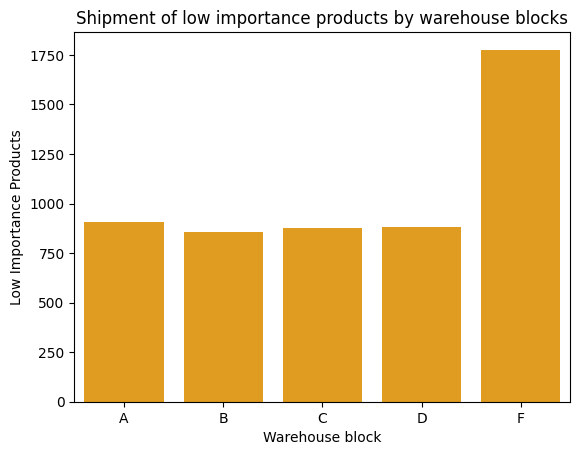

In [78]:
sns.barplot(data=low_importance_prods_dict, color='orange').set(xlabel='Warehouse block', ylabel='Low Importance Products',\
                                                                 title='Shipment of low importance products by warehouse blocks')

In [79]:
''' Which warehouse block had the highest percentage of shipped products delivered on time ? '''

' Which warehouse block had the highest percentage of shipped products delivered on time ? '

In [80]:
total_block_A_shipments = warehouse_blocks_dict['A']

In [81]:
total_block_A_shipments

1833

In [82]:
total_block_B_shipments = warehouse_blocks_dict['B']

In [83]:
total_block_C_shipments = warehouse_blocks_dict['C']

In [84]:
total_block_D_shipments = warehouse_blocks_dict['D']

In [85]:
total_block_F_shipments = warehouse_blocks_dict['F']

In [86]:
block_A_reached_on_time = np.sum(warehouse_block_grouped.get_group('A')['Reached_on_Time'] == 1)

In [87]:
block_A_reached_on_time

np.int64(1075)

In [88]:
percentage_block_A_reached_on_time = round((block_A_reached_on_time/total_block_A_shipments)*100, 3)

In [89]:
percentage_block_A_reached_on_time

np.float64(58.647)

In [90]:
block_B_reached_on_time = np.sum(warehouse_block_grouped.get_group('B')['Reached_on_Time'] == 1)

In [91]:
percentage_block_B_reached_on_time = round((block_B_reached_on_time/total_block_B_shipments)*100, 3)

In [92]:
block_C_reached_on_time = np.sum(warehouse_block_grouped.get_group('C')['Reached_on_Time'] == 1)

In [93]:
percentage_block_C_reached_on_time = round((block_C_reached_on_time/total_block_C_shipments)*100, 3)

In [94]:
block_D_reached_on_time = np.sum(warehouse_block_grouped.get_group('D')['Reached_on_Time'] == 1)

In [95]:
percentage_block_D_reached_on_time = round((block_D_reached_on_time/total_block_D_shipments)*100, 3)

In [96]:
block_F_reached_on_time = np.sum(warehouse_block_grouped.get_group('F')['Reached_on_Time'] == 1)

In [97]:
percentage_block_F_reached_on_time = round((block_F_reached_on_time/total_block_F_shipments)*100, 3)

In [98]:
percentage_warehouse_reached_on_time_dict = dict(A=percentage_block_A_reached_on_time, B=percentage_block_B_reached_on_time,\
                                                             C=percentage_block_C_reached_on_time, D=percentage_block_D_reached_on_time,\
                                                             F=percentage_block_F_reached_on_time)

[Text(0.5, 0, 'Warehouse block'),
 Text(0, 0.5, 'Percentage Timely Delivery'),
 Text(0.5, 1.0, 'Variation of timely product delivery across warehouse blocks')]

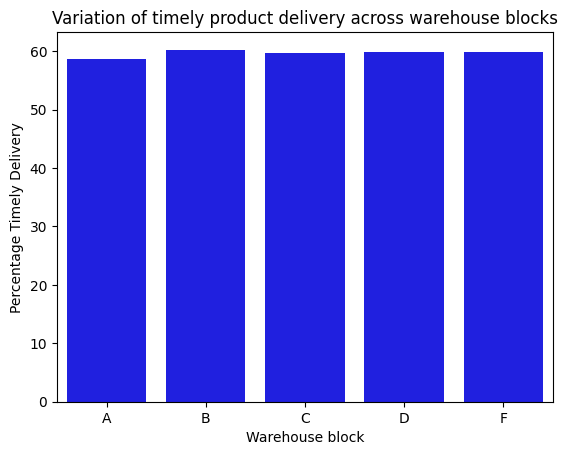

In [99]:
sns.barplot(data=percentage_warehouse_reached_on_time_dict, color='blue').set(xlabel='Warehouse block', ylabel='Percentage Timely Delivery',\
                                                                               title='Variation of timely product delivery across warehouse blocks')

In [100]:
''' What is the distribution of the different modes of shipment across the warehouse blocks? '''

' What is the distribution of the different modes of shipment across the warehouse blocks? '

In [101]:
block_A_modes_of_shipment = warehouse_block_grouped.get_group('A')['Mode_of_Shipment'].value_counts()

In [102]:
block_A_modes_of_shipment

Mode_of_Shipment
Ship      1242
Flight     297
Road       294
Name: count, dtype: int64

In [103]:
block_B_modes_of_shipment = warehouse_block_grouped.get_group('B')['Mode_of_Shipment'].value_counts()

In [104]:
block_B_modes_of_shipment

Mode_of_Shipment
Ship      1243
Flight     296
Road       294
Name: count, dtype: int64

In [105]:
block_C_modes_of_shipment = warehouse_block_grouped.get_group('C')['Mode_of_Shipment'].value_counts()

In [106]:
block_C_modes_of_shipment

Mode_of_Shipment
Ship      1244
Flight     295
Road       294
Name: count, dtype: int64

In [107]:
block_D_modes_of_shipment = warehouse_block_grouped.get_group('D')['Mode_of_Shipment'].value_counts()

In [108]:
block_D_modes_of_shipment

Mode_of_Shipment
Ship      1245
Flight     297
Road       292
Name: count, dtype: int64

In [109]:
block_F_modes_of_shipment = warehouse_block_grouped.get_group('F')['Mode_of_Shipment'].value_counts()

In [110]:
block_F_modes_of_shipment

Mode_of_Shipment
Ship      2488
Flight     592
Road       586
Name: count, dtype: int64

In [111]:
# We will need to group by 'mode of shipment' to answer the next set of questions

In [112]:
mode_of_shipment_grouped = df.groupby('Mode_of_Shipment')

In [113]:
''' What mode of shipment was used the most to ship products of high importance? '''

' What mode of shipment was used the most to ship products of high importance? '

In [114]:
flight_mode_high_importance_prods = np.sum(mode_of_shipment_grouped.get_group('Flight')['Product_importance'] == 'high')

In [115]:
flight_mode_high_importance_prods

np.int64(163)

In [116]:
ship_mode_high_importance_prods = np.sum(mode_of_shipment_grouped.get_group('Ship')['Product_importance'] == 'high')

In [117]:
ship_mode_high_importance_prods

np.int64(627)

In [118]:
road_mode_high_importance_prods = np.sum(mode_of_shipment_grouped.get_group('Road')['Product_importance'] == 'high')

In [119]:
road_mode_high_importance_prods

np.int64(158)

In [120]:
mode_of_shipment_high_importance_dict = dict(Flight=flight_mode_high_importance_prods, Ship=ship_mode_high_importance_prods,\
                                                             Road=road_mode_high_importance_prods)

[Text(0.5, 0, 'Mode of Shipment'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Mode of shipment for high importance products')]

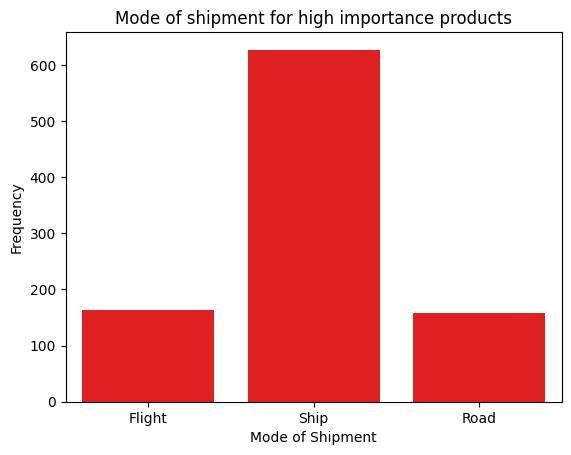

In [122]:
sns.barplot(data=mode_of_shipment_high_importance_dict, color='red').set(xlabel='Mode of Shipment', ylabel='Frequency',\
                                                                           title='Mode of shipment for high importance products')

In [123]:
''' What mode of shipment was used the most to ship products of medium importance? '''

' What mode of shipment was used the most to ship products of medium importance? '

In [124]:
flight_mode_medium_importance_prods = np.sum(mode_of_shipment_grouped.get_group('Flight')['Product_importance'] == 'medium')

In [125]:
ship_mode_medium_importance_prods = np.sum(mode_of_shipment_grouped.get_group('Ship')['Product_importance'] == 'medium')

In [126]:
road_mode_medium_importance_prods = np.sum(mode_of_shipment_grouped.get_group('Road')['Product_importance'] == 'medium')

In [127]:
mode_of_shipment_medium_importance_dict = pd.Series(dict(Flight=flight_mode_medium_importance_prods, Ship=ship_mode_medium_importance_prods,\
                                                             Road=road_mode_medium_importance_prods))

[Text(0.5, 0, 'Mode of Shipment'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Mode of shipment for medium importance products')]

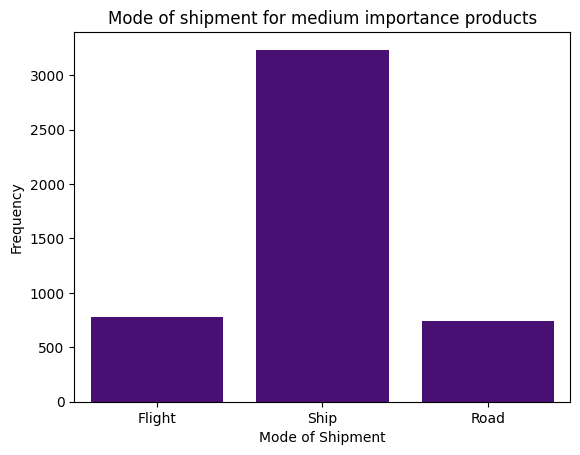

In [128]:
sns.barplot(data=mode_of_shipment_medium_importance_dict, color='indigo').set(xlabel='Mode of Shipment', ylabel='Frequency',\
                                                                           title='Mode of shipment for medium importance products')

In [129]:
''' What mode of shipment was used the most to ship products of medium importance? '''

' What mode of shipment was used the most to ship products of medium importance? '

In [130]:
flight_mode_low_importance_prods = np.sum(mode_of_shipment_grouped.get_group('Flight')['Product_importance'] == 'low')

In [131]:
ship_mode_low_importance_prods = np.sum(mode_of_shipment_grouped.get_group('Ship')['Product_importance'] == 'low')

In [132]:
road_mode_low_importance_prods = np.sum(mode_of_shipment_grouped.get_group('Road')['Product_importance'] == 'low')

In [133]:
mode_of_shipment_low_importance_dict = pd.Series(dict(Flight=flight_mode_low_importance_prods, Ship=ship_mode_low_importance_prods,\
                                                             Road=road_mode_low_importance_prods))

[Text(0.5, 0, 'Mode of Shipment'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Mode of shipment for low importance products')]

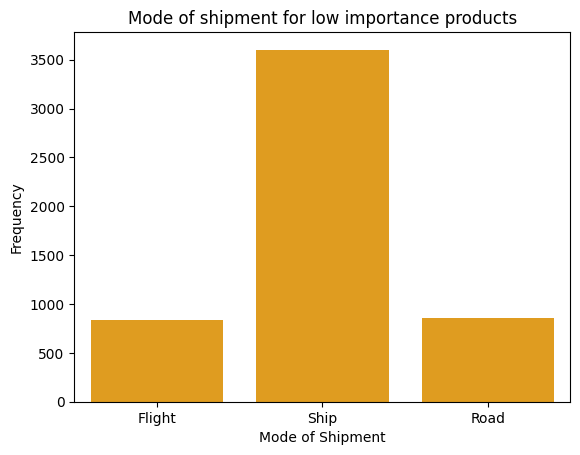

In [134]:
sns.barplot(data=mode_of_shipment_low_importance_dict, color='orange').set(xlabel='Mode of Shipment', ylabel='Frequency',\
                                                                             title='Mode of shipment for low importance products')

In [135]:
''' What mode of shipment had the highest percentage of shipped products delivered on time? '''

' What mode of shipment had the highest percentage of shipped products delivered on time? '

In [136]:
total_shipments_by_flight = modes_of_shipment['Flight']

In [137]:
total_shipments_by_ship = modes_of_shipment['Ship']

In [138]:
total_shipments_by_road = modes_of_shipment['Road']

In [139]:
prods_reached_on_time_flight = np.sum(mode_of_shipment_grouped.get_group('Flight')['Reached_on_Time'] == 1)

In [140]:
prods_reached_on_time_flight

np.int64(1069)

In [141]:
percentage_reached_on_time_flight = round((prods_reached_on_time_flight/total_shipments_by_flight)*100,3)

In [142]:
percentage_reached_on_time_flight

np.float64(60.158)

In [143]:
prods_reached_on_time_ship = np.sum(mode_of_shipment_grouped.get_group('Ship')['Reached_on_Time'] == 1)

In [144]:
percentage_reached_on_time_ship = round((prods_reached_on_time_ship/total_shipments_by_ship)*100,3)

In [145]:
percentage_reached_on_time_ship

np.float64(59.756)

In [146]:
prods_reached_on_time_road = np.sum(mode_of_shipment_grouped.get_group('Road')['Reached_on_Time'] == 1)

In [147]:
percentage_reached_on_time_road = round((prods_reached_on_time_road/total_shipments_by_road)*100,3)

In [148]:
percentage_reached_on_time_road

np.float64(58.807)

In [149]:
percentage_shipment_mode_reached_on_time_dict = dict(Flight=percentage_reached_on_time_flight, Ship=percentage_reached_on_time_ship,\
                                                             Road=percentage_reached_on_time_road)

[Text(0.5, 0, 'Mode of Shipment'),
 Text(0, 0.5, 'Percentage Timely Delivery'),
 Text(0.5, 1.0, 'Variation of timely product delivery with mode of shipment')]

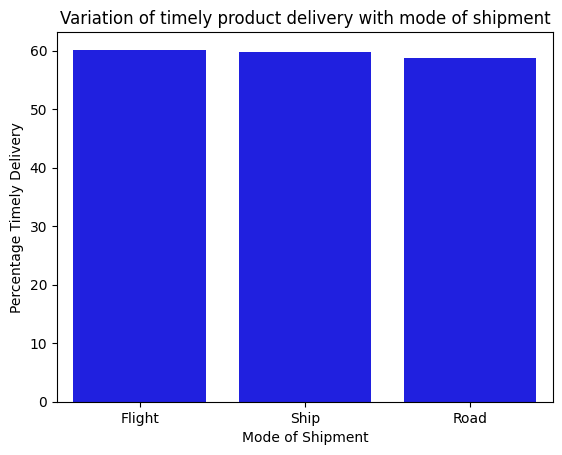

In [150]:
sns.barplot(data=percentage_shipment_mode_reached_on_time_dict, color='blue').set(xlabel='Mode of Shipment', ylabel='Percentage Timely Delivery',\
                                                                                   title='Variation of timely product delivery with mode of shipment')

In [151]:
''' What is the variation of product shipment based on customers' genders? '''

" What is the variation of product shipment based on customers' genders? "

In [152]:
total_shipments_for_males = np.sum(df['Gender'] == 'M')

In [153]:
total_shipments_for_males

np.int64(5454)

In [154]:
total_shipments_for_females = np.sum(df['Gender'] == 'F')

In [155]:
total_shipments_for_females

np.int64(5545)

In [156]:
shipments_by_gender_series = pd.Series(dict(Male=total_shipments_for_males, Female=total_shipments_for_females))

[Text(0.5, 0, 'Gender'),
 Text(0, 0.5, 'Total Shipments'),
 Text(0.5, 1.0, 'Variation of product shipments with gender')]

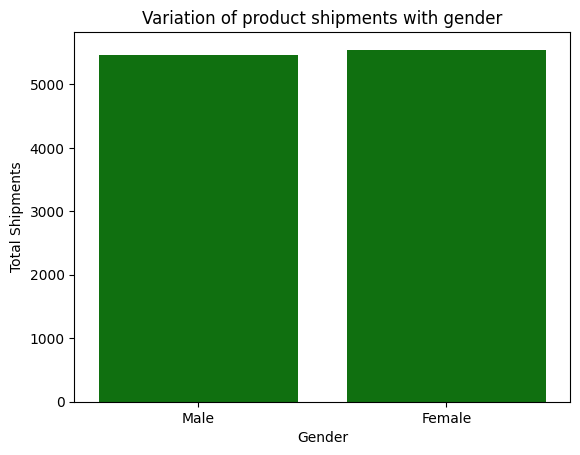

In [157]:
sns.barplot(data=shipments_by_gender_series, color='g').set(xlabel='Gender', ylabel='Total Shipments',\
                                                           title='Variation of product shipments with gender')

In [158]:
''' What is the distribution of customer care calls across the genders? '''

' What is the distribution of customer care calls across the genders? '

In [159]:
genders_grouped = df.groupby('Gender')

In [160]:
customer_care_calls_males = genders_grouped.get_group('M')['Customer_care_calls'].sum()

In [161]:
customer_care_calls_males

np.int64(22129)

In [162]:
customer_care_calls_females = genders_grouped.get_group('F')['Customer_care_calls'].sum()

In [163]:
customer_care_calls_females

np.int64(22466)

In [173]:
customer_care_calls_by_gender_dict = dict(Male=customer_care_calls_males, Female=customer_care_calls_females)

[Text(0.5, 0, 'Gender'),
 Text(0, 0.5, 'Customer care calls'),
 Text(0.5, 1.0, 'Variation of customer care calls with gender')]

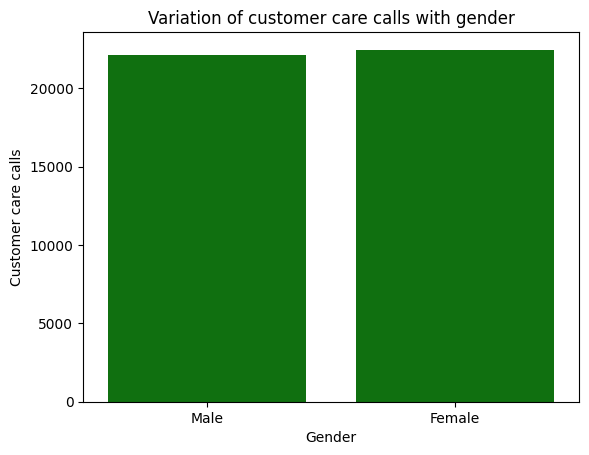

In [174]:
sns.barplot(data=customer_care_calls_by_gender_dict, color='g').set(xlabel='Gender', ylabel='Customer care calls',\
                                                                     title='Variation of customer care calls with gender')

In [175]:
''' How does revenue vary across the genders? '''

' How does revenue vary across the genders? '

In [185]:
total_revenue_males = genders_grouped.get_group('M')['Cost_of_the_Product'].sum() - genders_grouped.get_group('M')['Discount_offered'].sum()

In [194]:
f'{total_revenue_males:,.2f}'

'1,079,748.00'

In [189]:
total_revenue_females = genders_grouped.get_group('F')['Cost_of_the_Product'].sum() - genders_grouped.get_group('F')['Discount_offered'].sum()

In [193]:
f'{total_revenue_females:,.2f}'

'1,085,115.00'

In [191]:
revenue_by_gender_dict = dict(Male=total_revenue_males, Female=total_revenue_females)

[Text(0.5, 0, 'Gender'),
 Text(0, 0.5, 'Total Revenue'),
 Text(0.5, 1.0, 'Share of total revenue by gender')]

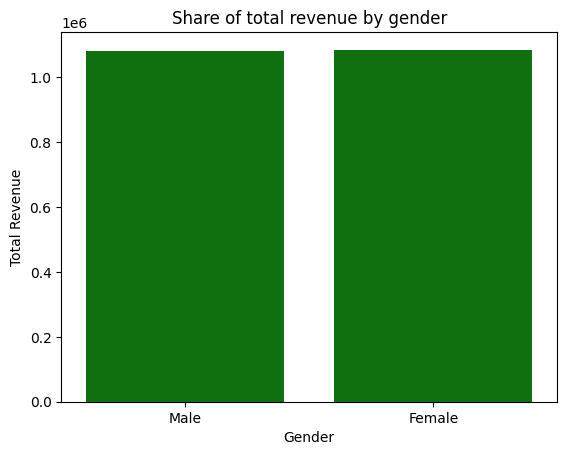

In [200]:
sns.barplot(data=revenue_by_gender_dict, color='g').set(xlabel='Gender', ylabel='Total Revenue',\
                                                         title='Share of total revenue by gender')

In [195]:
''' What is the average revenue per weight of products shipped? '''

' What is the average revenue per weight of products shipped? '

In [196]:
revenue_per_product_weight = total_revenue/total_shipment_weight_in_tonnes # -- dollars per tonne

In [197]:
revenue_per_product_weight

np.float64(54161.4513685701)

In [198]:
revenue_per_weight_str = f'${revenue_per_product_weight:,.2f}'

In [201]:
revenue_per_weight_str

'$54,161.45'

In [202]:
''' Which level of product importance (high, medium, or low) enjoyed the highest percentage discount? '''

' Which level of product importance (high, medium, or low) enjoyed the highest percentage discount? '

In [203]:
product_importance_grouped = df.groupby('Product_importance')

In [204]:
high_importance_prods_discounts = product_importance_grouped.get_group('high')['Discount_offered'].sum()

In [205]:
high_importance_prods_revenue = product_importance_grouped.get_group('high')['Cost_of_the_Product'].sum()

In [206]:
percentage_discount_high_importance = round((high_importance_prods_discounts/high_importance_prods_revenue)*100, 3)

In [207]:
percentage_discount_high_importance

np.float64(7.194)

In [208]:
medium_importance_prods_discounts = product_importance_grouped.get_group('medium')['Discount_offered'].sum()

In [209]:
medium_importance_prods_revenue = product_importance_grouped.get_group('medium')['Cost_of_the_Product'].sum()

In [210]:
percentage_discount_medium_importance = round((medium_importance_prods_discounts/medium_importance_prods_revenue)*100, 3)

In [211]:
percentage_discount_medium_importance

np.float64(6.439)

In [212]:
low_importance_prods_discounts = product_importance_grouped.get_group('low')['Discount_offered'].sum()

In [213]:
low_importance_prods_revenue = product_importance_grouped.get_group('low')['Cost_of_the_Product'].sum()

In [214]:
percentage_discount_low_importance = round((low_importance_prods_discounts/low_importance_prods_revenue)*100, 3)

In [215]:
percentage_discount_low_importance

np.float64(6.151)

In [216]:
prod_importance_percentage_discount_dict = dict(High=percentage_discount_high_importance, Medium=percentage_discount_medium_importance,\
                                                           Low=percentage_discount_low_importance)

[Text(0.5, 0, 'Product Importance'),
 Text(0, 0.5, 'Percentage Discount offered'),
 Text(0.5, 1.0, 'Discount offered based on Product Importance')]

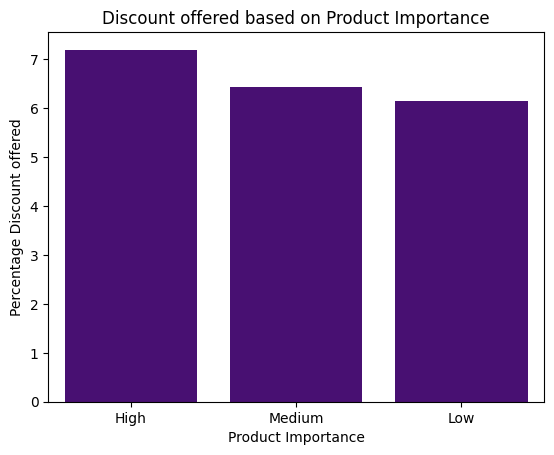

In [217]:
sns.barplot(data=prod_importance_percentage_discount_dict, color='indigo').set(xlabel='Product Importance', ylabel='Percentage Discount offered',\
                                                                                title='Discount offered based on Product Importance')

In [218]:
product_importance_revenue_dict = dict(High=high_importance_prods_revenue, Medium=medium_importance_prods_revenue,\
                                                           Low=low_importance_prods_revenue)

[Text(0.5, 0, 'Product Importance'),
 Text(0, 0.5, 'Total Revenue ($ Million)'),
 Text(0.5, 1.0, 'Revenue Share based on Product Importance')]

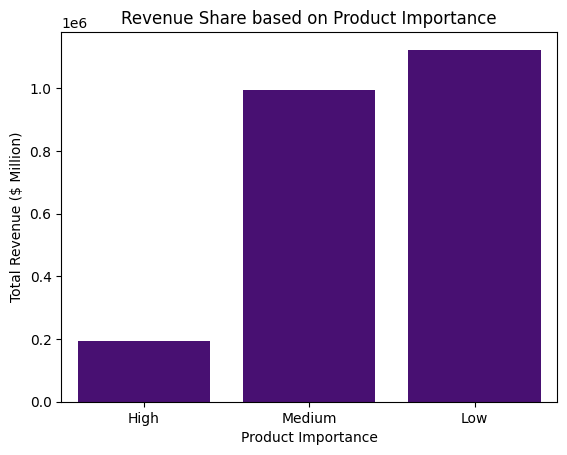

In [220]:
sns.barplot(data=product_importance_revenue_dict, color='indigo').set(xlabel='Product Importance', ylabel='Total Revenue ($ Million)',\
                                                                        title='Revenue Share based on Product Importance')